## КЛАССИФИКАЦИЯ

In [12]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn

# Загрузка данных

In [3]:
df = pd.read_csv('AB_NYC_2019.csv',parse_dates=['last_review'],index_col=['id'])


In [125]:
#Сколько записей в базе?
df.shape[0]

48895

# Гистограммы признаков

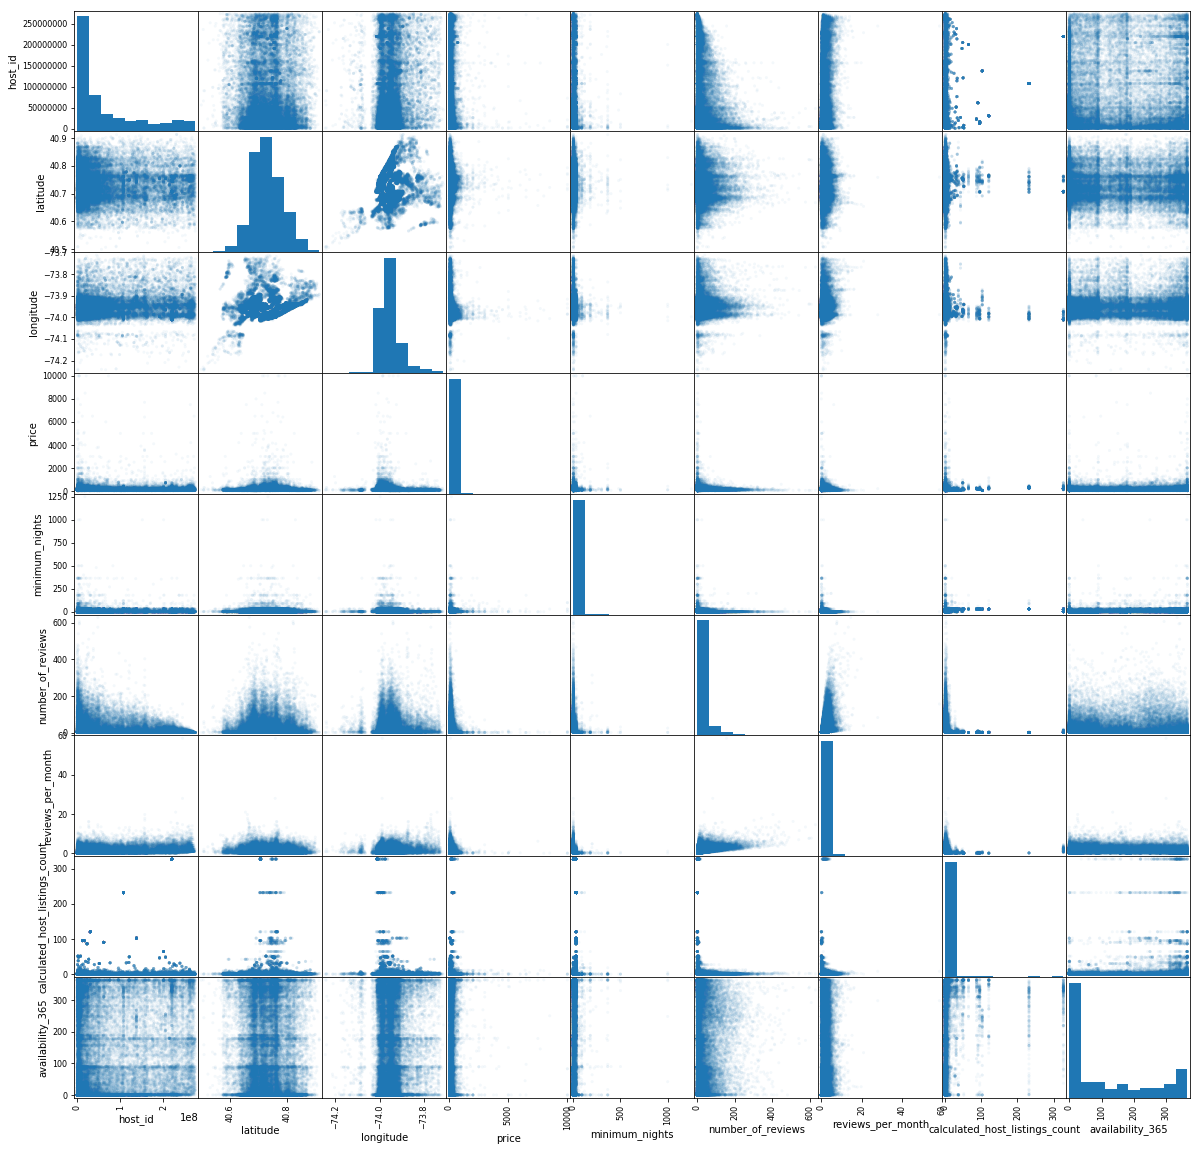

In [6]:
#pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму,
#а для каждой пары таких переменных – диаграмму рассеяния
a = pd.plotting.scatter_matrix(df, alpha=0.05, figsize=(20, 20))

In [9]:
#Постройте гистограммы всех признаков другой способ
def hist(x,bins_x):
    hist, bins = np.histogram(x, bins=bins_x)
    width = 0.8 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()
#hist(df["availability_365"],15)
#hist(df["calculated_host_listings_count"],20)
#hist(df["number_of_reviews"],20)
#hist(df["price"],50)
#hist(df["minimum_nights"],30)

# Объекты на карте, группировка по ценам\районам

In [10]:
#маска плотности предложений на карте
import folium
from folium.plugins import HeatMap
m = folium.Map([40.7128, -74.0060], zoom_start=11)
HeatMap(df[['latitude','longitude']],
         radius=8, gradient={0.2:'blue', 0.4:'purple', 0.6:'orange',
                                     1.0: 'red'}).add_to(m)
display(m)

[Text(0.5, 1.0, 'Широта и долгота')]

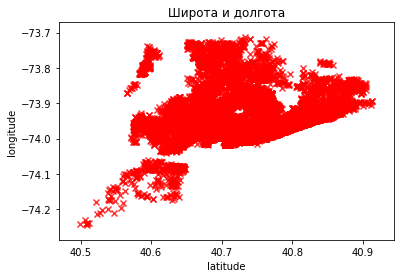

In [10]:
#объекты по их широте и долготе
ax = seaborn.regplot(x = 'latitude', y = 'longitude', data = df, marker = "x", color = 'r',
 fit_reg = False)
ax.set(title = "Широта и долгота")

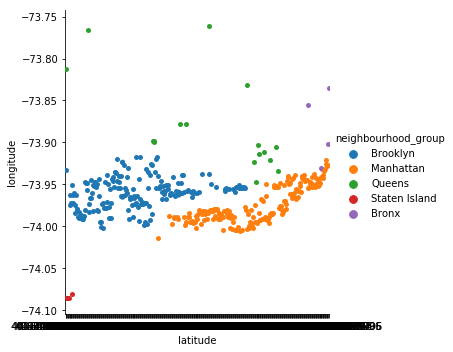

In [35]:
#группировка по районам seaborn
df_gr = df.groupby('neighbourhood_group')
seaborn.catplot(x='latitude', y='longitude', hue='neighbourhood_group', data=df.head(400))

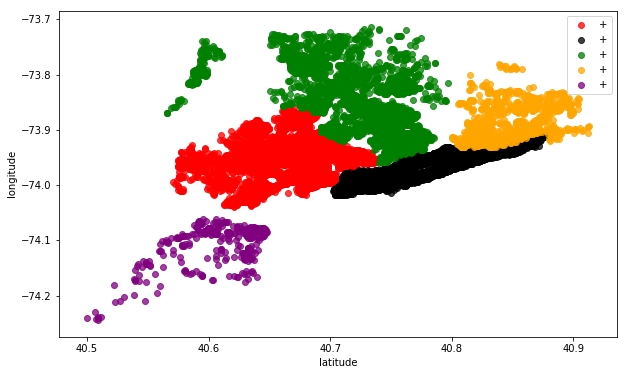

In [80]:
#группировка по районам plt
col1 = 'latitude'
col2 = 'longitude'

plt.figure(figsize=(10, 6))

plt.scatter(df[col1][df['neighbourhood_group'] == 'Brooklyn'],
            df[col2][df['neighbourhood_group'] == 'Brooklyn'],
            alpha=0.75,
            color='red',
            label='Brooklyn')
plt.scatter(df[col1][df['neighbourhood_group'] == 'Manhattan'],
            df[col2][df['neighbourhood_group'] == 'Manhattan'],
            alpha=0.75,
            color='black',
            label='Manhattan')
plt.scatter(df[col1][df['neighbourhood_group'] == 'Queens'],
            df[col2][df['neighbourhood_group'] == 'Queens'],
            alpha=0.75,
            color='green',
            label='Queens')
plt.scatter(df[col1][df['neighbourhood_group'] == 'Bronx'],
            df[col2][df['neighbourhood_group'] == 'Bronx'],
            alpha=0.75,
            color='orange',
            label='Bronx')
plt.scatter(df[col1][df['neighbourhood_group'] == 'Staten Island'],
            df[col2][df['neighbourhood_group'] == 'Staten Island'],
            alpha=0.75,
            color='purple',
            label='Staten Island')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

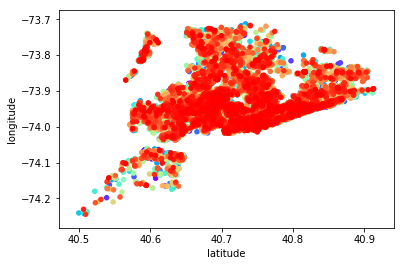

In [9]:
#группировка по цене
df.plot(kind='scatter', x='latitude', y='longitude',
        color=cm.rainbow(np.linspace(0, 1, len(df['price']))))

# Кореляция

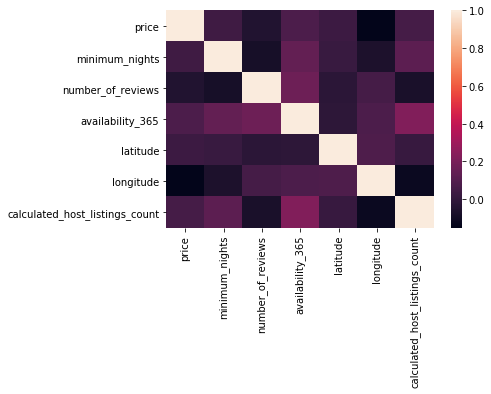

In [45]:
corr_matrix = df[['price', 'minimum_nights','number_of_reviews',
                      'availability_365','latitude','longitude',"calculated_host_listings_count"]].corr()
seaborn.heatmap(corr_matrix)

# Поиск самых популярных слов в базе данных

In [8]:
import re

word_dict={}
def dict_word(dict,list):
    for i in range(len(list)):
        word=list[i]
        if(word.isalpha()):
            if(word in dict):
                dict[word]=dict[word]+1
            else:
                dict[word]=1
    return dict

with open('C:/Users/User/Desktop/Panda/AB_NYC_2019.csv', 'r', encoding='utf-8') as sms:
    for line in sms:
        word_list=re.findall(r'\w+', sms.read().lower())
        word_dict=dict_word(word_dict,word_list)

        sort_word_dict={}
    def sort_value_dict(sort_dict,dict,f_name):
        list_d = list(dict.items())
        list_d.sort(key=lambda i: i[1],reverse=True)
        for i in list_d:
            sort_dict[i[0]]=i[1]
        return sort_dict
sort_word_dict=sort_value_dict(sort_word_dict,word_dict,'sort_word_dict')
key_list = list(sort_word_dict.keys())
print('Топ 10 самых популярных слов в базе', *key_list[:10], sep=', ')


Топ 10 самых популярных слов в базе, room, apt, private, home, entire, manhattan, brooklyn, in, east, bedroom


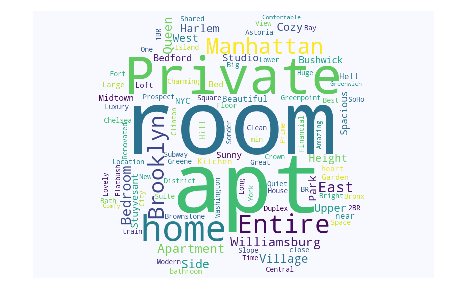

In [34]:
#через wordcloud
from PIL import  Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
with open('C:/Users/User/Desktop/Panda/AB_NYC_2019.csv', 'r', encoding='utf-8') as sms:
    text = sms.read()
mask = np.array (Image.open ("mask.png")) 
wordcloud = WordCloud(background_color="GhostWhite", max_words = 100, width=400, height=400, margin=2,collocations=False,
                  mask=mask,font_step=2).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)


# Подготовка данных

In [50]:
df = pd.read_csv('AB_NYC_2019.csv',parse_dates=['last_review'],index_col=['id'])

categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

#заполняем отсутствующие значения средним в столбце 'reviews_per_month'
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median(axis=0), axis=0)
#удаляем столбец 'last_review' и строки,где не информации в столбцах 'name', 'host_name'
del df['last_review']
df = df.dropna(axis=0,subset=['name', 'host_name'])
#заполняем все пропуски в категориальных столбцах наиболее частым значением
df_describe = df.describe(include=[object])
for c in categorical_columns:
    df[c] = df[c].fillna(df_describe[c]['top'])
#проверяем,что данные есть во всех столбцах и их одинаковое кол-во
df.count(axis=0)

binary_columns    = [c for c in categorical_columns if df_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if df_describe[c]['unique'] > 2]
nonbinary_columns_3 = [c for c in categorical_columns if df_describe[c]['unique'] <= 3]
print (binary_columns, nonbinary_columns)
#все признаки не бинарные
#используем room_type

df_nonbinary = pd.get_dummies(df[nonbinary_columns_3])
df_geo = df[[
 'latitude',
 'longitude',]]
#normal-s
df_numerical = df[[
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]
df_numerical = (df_numerical - df_numerical.mean()) / df_numerical.std()

data = pd.concat((df_numerical, df[binary_columns], df_nonbinary, 
                  df[['neighbourhood_group']]), axis=1)

df = pd.DataFrame(data)

# Данные для обучения
# Х - признаки  
# Y - верные ответы 

Xn = df.drop(('neighbourhood_group'), axis=1)  
Yn = df['neighbourhood_group']

X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size = 0.3, random_state = 11)

[] ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


# Предсказание района

# Метод ближайших соседей

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets


In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
from time import time
def KNClass(X_train, Y_train, X_test, Y_test):
    n_neighbors_array = [1, 3, 5, 7, 10, 15]
    meric_array = ['euclidean','manhattan', 'chebyshev',]
    err = {'euclidean':[],'manhattan':[], 'chebyshev':[],}
    t = {'euclidean':[],'manhattan':[], 'chebyshev':[],}
    for i in n_neighbors_array:
        for met in meric_array:
            t0 = time()
            knn = neighbors.KNeighborsClassifier(n_neighbors=i, metric=met,weights='distance')
            knn.fit(X_train, Y_train)
            y_test_predict = knn.predict(X_test)
            t1 = time()
            err[met].append(round(np.mean(Y_test  != y_test_predict)*100))
            t[met].append(round(t1-t0,2))
    p1 = pd.Series(t,index=n_neighbors_array)
    p2 = pd.Series(err,index=n_neighbors_array)
    KNeighbors_time = pd.DataFrame(t, index=n_neighbors_array)                
    KNeighbors_err = pd.DataFrame(err, index=n_neighbors_array)
    return(KNeighbors_err, KNeighbors_time)
print(KNClass(X_train, Y_train, X_test, Y_test)[0]) 
print(KNClass(X_train, Y_train, X_test, Y_test)[1])  

    euclidean  manhattan  chebyshev
1         2.0        2.0        2.0
3         2.0        2.0        2.0
5         2.0        2.0        2.0
7         2.0        2.0        2.0
10        2.0        2.0        3.0
15        2.0        2.0        3.0
    euclidean  manhattan  chebyshev
1        1.73       3.16       1.28
3        2.56       4.69       1.86
5        2.95       5.74       2.27
7        3.43       6.78       2.58
10       4.08       8.35       3.63
15       5.26       8.99       3.42


# SVC – машина опорных векторов

In [28]:
from sklearn.svm import SVC
def svc(X_train, Y_train, X_test, Y_test):
    svc = SVC(gamma='scale')
    svc.fit(X_train, Y_train)

    err_train = round(np.mean(Y_train != svc.predict(X_train))*100, 2)
    err_test  = round(np.mean(Y_test  != svc.predict(X_test))*100, 2)
    
    return(err_train, err_test)
print (svc(X_train, Y_train, X_test, Y_test))

(1.09, 1.28)


# Наивный Байес

In [33]:
import numpy as np
import pylab as pl
from sklearn.naive_bayes import GaussianNB

def nb(X_train, Y_train, X_test, Y_test):
    model = GaussianNB()
    # Train the model using the training sets 
    model.fit(X_train, Y_train)
    
    err_train = round(np.mean(Y_train != model.predict(X_train))*100, 2)
    err_test  = round(np.mean(Y_test  != model.predict(X_test))*100, 2)
    
    return(err_train, err_test)

print (nb(X_train, Y_train, X_test, Y_test))


(24.97, 23.78)


# Решающие деревья

In [54]:
from sklearn.tree import export_graphviz, plot_tree
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier

def tree(X_train, Y_train, X_test, Y_test, integer=False):
    tree_array = [6, 10, 14, 18, 22, 26]
    # Укажем критерий качества разбиения
    crit = 'entropy'
    
    for i in tree_array:
        t1 = time()
        clf_tree = DecisionTreeClassifier(criterion=crit, max_depth=i, random_state=20, presort=True)

        clf_tree.fit(X=X_train, y=Y_train)
        if integer:
            err_train = round(np.mean(Y_train != clf_tree.predict(X_train).astype('int'))*100, 2)
            err_test  = round(np.mean(Y_test  != clf_tree.predict(X_test).astype('int'))*100, 2)
        else:
            err_train = round(np.mean(Y_train != clf_tree.predict(X_train))*100, 2)
            err_test  = round(np.mean(Y_test  != clf_tree.predict(X_test))*100, 2)
        t = t1 - time()
        print("Глубина дерева: {}, ошибка на обучающей: {}, ошибка на тестовой: {}, время {}".format(clf_tree.get_depth(), err_train, err_test, t))
tree(X_train, Y_train, X_test, Y_test)

Глубина дерева: 6, ошибка на обучающей: 0.33, ошибка на тестовой: 0.5, время -0.23811745643615723
Глубина дерева: 10, ошибка на обучающей: 0.0, ошибка на тестовой: 0.21, время -0.3434751033782959
Глубина дерева: 11, ошибка на обучающей: 0.0, ошибка на тестовой: 0.19, время -0.28823208808898926
Глубина дерева: 11, ошибка на обучающей: 0.0, ошибка на тестовой: 0.19, время -0.3077826499938965
Глубина дерева: 11, ошибка на обучающей: 0.0, ошибка на тестовой: 0.19, время -0.2610478401184082
Глубина дерева: 11, ошибка на обучающей: 0.0, ошибка на тестовой: 0.19, время -0.30792903900146484


# Предсказание цены

# Изменение данных

In [55]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('AB_NYC_2019.csv',parse_dates=['last_review'],index_col=['id'])

categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']


df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median(axis=0), axis=0)
df = df.dropna(axis=0,subset=['name', 'host_name'])
#создаем сериес с ценами, поделенными по диапазонам
df['price'] = pd.qcut(df['price'],9,labels=list(map(str,np.arange(9))))

df_describe = df.describe(include=[object])
for c in categorical_columns:
    df[c] = df[c].fillna(df_describe[c]['top'])


binary_columns    = [c for c in categorical_columns if df_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if df_describe[c]['unique'] > 2]
nonbinary_columns_3 = [c for c in categorical_columns if df_describe[c]['unique'] <= 3]
print (binary_columns, nonbinary_columns)
#все признаки не бинарные
#используем room_type

df_nonbinary = pd.get_dummies(df[nonbinary_columns_3])
df_pr_class = df[[
 'price']]
df_geo = df[[
 'latitude',
 'longitude',]]
#normal-s
df_numerical = df[[
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]
df_numerical = (df_numerical - df_numerical.mean()) / df_numerical.std()
df_geo = (df_geo - df_geo.mean()) / df_geo.std()

data = pd.concat((df_numerical, df[binary_columns], df_nonbinary, df_pr_class,df_geo
                 ), axis=1)

df = pd.DataFrame(data)

Xn = df.drop(('price'), axis=1)  
Yn = df['price']
Yn = Yn.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size = 0.2, random_state = 11)

[] ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


# Метод ближайших соседей

In [41]:
print(KNClass(X_train, Y_train, X_test, Y_test)[0]) 
print(KNClass(X_train, Y_train, X_test, Y_test)[1])  

    euclidean  manhattan  chebyshev
1        73.0       72.0       73.0
3        72.0       71.0       72.0
5        71.0       69.0       71.0
7        70.0       69.0       70.0
10       69.0       68.0       69.0
15       68.0       68.0       69.0
    euclidean  manhattan  chebyshev
1        1.04       1.56       0.78
3        1.20       2.11       1.07
5        1.43       2.45       1.38
7        1.65       2.92       1.64
10       1.75       3.34       2.22
15       2.67       4.10       2.17


# SVC

In [42]:
print (svc(X_train, Y_train, X_test, Y_test))

(66.71, 68.08)


# Решающие деревья

In [56]:
tree(X_train, Y_train, X_test, Y_test,integer=1)

Глубина дерева: 6, ошибка на обучающей: 68.51, ошибка на тестовой: 69.18, время -0.3878035545349121
Глубина дерева: 10, ошибка на обучающей: 61.9, ошибка на тестовой: 68.28, время -0.980421781539917
Глубина дерева: 14, ошибка на обучающей: 44.53, ошибка на тестовой: 69.45, время -2.842195749282837
Глубина дерева: 18, ошибка на обучающей: 20.03, ошибка на тестовой: 71.75, время -5.602936029434204
Глубина дерева: 22, ошибка на обучающей: 5.56, ошибка на тестовой: 72.18, время -7.293022394180298
Глубина дерева: 26, ошибка на обучающей: 0.77, ошибка на тестовой: 72.9, время -8.09796667098999


# Байес

In [58]:
print (nb(X_train, Y_train, X_test, Y_test))

(76.1, 75.21)
